### exercise 7: tree based methods 

### task 3: bagging and random forests 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv(r'C:\Users\Chijun Zhang\Documents\jupyter\machine learning exercise\datasets\Boston.csv', index_col=0)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
X = df[df.columns[0:-1]].values 
y = df['medv'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=0)

In [4]:
bagger = RandomForestRegressor(n_estimators=500, criterion='mse', max_features='auto', bootstrap=True, 
                               oob_score=True, random_state=0 )

bag_est = bagger.fit(X_train,y_train)

In [5]:
y_pred = bag_est.predict(X_test)

print("Test MSE = ", np.mean((y_pred-y_test)**2))

Test MSE =  16.198644766324133


Text(0, 0.5, 'y_actual')

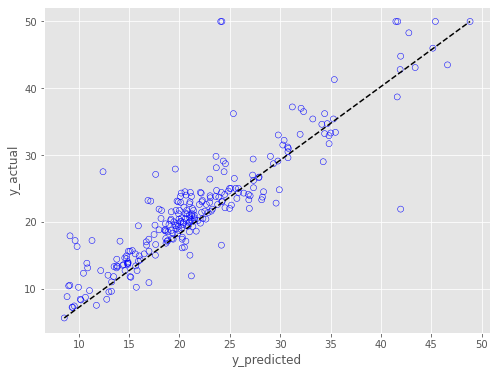

In [6]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.scatter(y_pred, y_test, facecolor='None', edgecolor='b')
ax.plot([min(y_pred), max(y_pred)], [min(y_test), max(y_test)], linestyle='--', color='k');
ax.set_xlabel('y_predicted')
ax.set_ylabel('y_actual')

In [7]:
forest = RandomForestRegressor(n_estimators=500, criterion='mse', max_features=4, bootstrap=True, 
                               oob_score=True, random_state=0 )

forest_est = forest.fit(X_train, y_train)

In [8]:
y_pred = forest_est.predict(X_test)

mse = np.mean((y_pred-y_test)**2)
print('Test MSE =', mse)

Test MSE = 15.78764721754943


In [9]:
feature_importances = pd.Series(data=forest_est.feature_importances_, index=list(df.columns[0:-1]))
feature_importances = feature_importances.sort_values(axis=0, ascending=False)
feature_importances

lstat      0.301275
rm         0.281973
ptratio    0.078333
indus      0.063642
crim       0.058872
nox        0.057342
dis        0.053900
age        0.032379
tax        0.031454
black      0.019061
zn         0.009735
rad        0.007223
chas       0.004811
dtype: float64

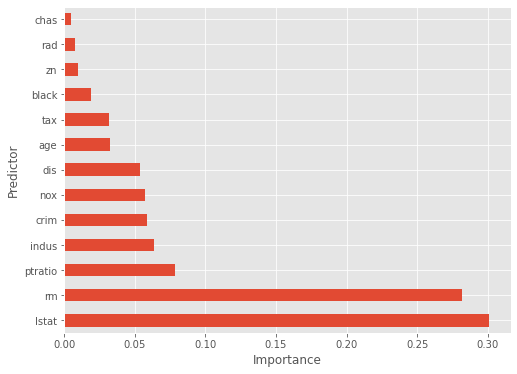

In [10]:
fig,ax1 = plt.subplots(1,1, figsize=(8,6))
feature_importances.plot(kind='barh', ax=ax1);
ax1.set_xlabel('Importance');
ax1.set_ylabel('Predictor');